In [2]:
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import numpy as np
import pandas as pd
import xarray as xr
import cartopy
import cartopy.crs as ccrs


In [3]:
fn_aca = '/net/pc200037/nobackup/users/linden/cmip6data/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/historical/r1i1p1f1/fx/areacella/gr/areacella_fx_EC-Earth3_historical_r1i1p1f1_gr.nc'
fn_aco = '/net/pc200037/nobackup/users/linden/cmip6data/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/historical/r1i1p1f1/Ofx/areacello/gn/areacello_Ofx_EC-Earth3_historical_r1i1p1f1_gn.nc'
aca = xr.open_dataset(fn_aca)
aco = xr.open_dataset(fn_aco)

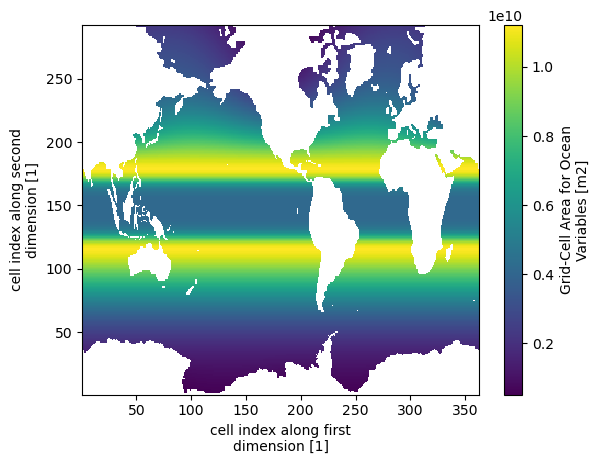

In [4]:
aco.areacello.plot()

In [5]:
fns = '/net/pc200037/nobackup/users/linden/cmip6data/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/historical/r1i1p1f1/SImon/siconc/gn/siconc_SImon_EC-Earth3_historical_r1i1p1f1_gn_185001-185012.nc'
multifns = '/net/pc200037/nobackup/users/linden/cmip6data/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/historical/r1i1p1f1/SImon/siconc/gn/*.nc'
ds = xr.open_dataset(fns)
multids = xr.open_mfdataset(multifns)

In [6]:
ds

<xarray.Dataset>
Dimensions:             (time: 12, bnds: 2, j: 292, i: 362, vertices: 4)
Coordinates:
  * time                (time) datetime64[ns] 1850-01-16T12:00:00 ... 1850-12...
  * j                   (j) int32 1 2 3 4 5 6 7 ... 286 287 288 289 290 291 292
  * i                   (i) int32 1 2 3 4 5 6 7 ... 356 357 358 359 360 361 362
    latitude            (j, i) float64 ...
    longitude           (j, i) float64 ...
    type                |S7 ...
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (time, bnds) datetime64[ns] ...
    vertices_latitude   (j, i, vertices) float64 ...
    vertices_longitude  (j, i, vertices) float64 ...
    siconc              (time, j, i) float32 ...
Attributes: (12/48)
    Conventions:                        CF-1.7 CMIP-6.2
    activity_id:                        CMIP
    branch_method:                      standard
    branch_time:                        0.0
    comment:                            Production: Thomas Reerink at KNMI
    contact:                            cmip6-data@ec-earth.org
    ...                                 ...
    cmor_version:                       3.5.0
    tracking_id:                        hdl:21.14100/9ceb2de8-8785-4223-913f-...
    branch_time_in_child:               0.0D
    branch_time_in_parent:              149749.0D
    history:                            2019-09-26T09:10:49Z ; CMOR rewrote d...
    latest_applied_cmor_fixer_version:  v3.0

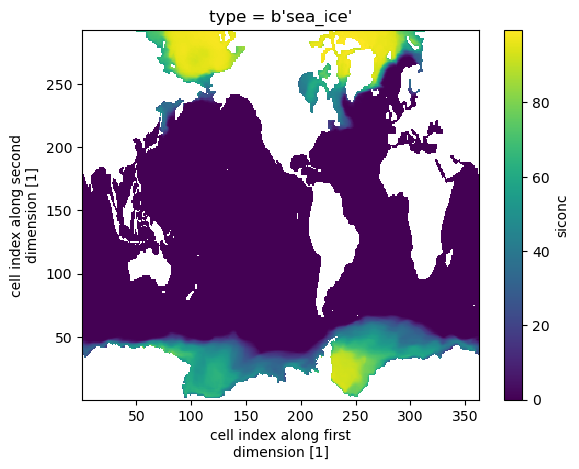

In [8]:
ds.siconc.mean('time').plot()

## maps

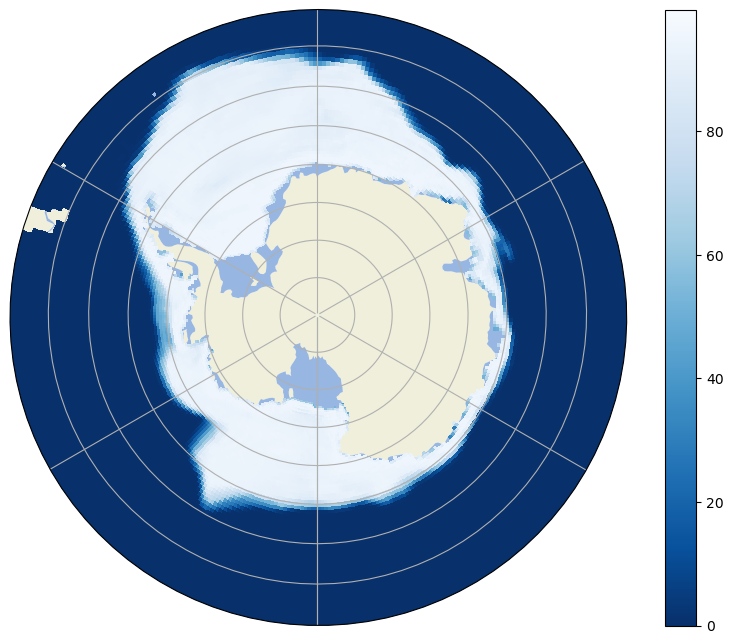

In [7]:

fig = plt.figure(figsize=[10, 8])
ax1 = plt.subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())
# Limit the map to -60 degrees latitude and below.
ax1.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
ax1.add_feature(cartopy.feature.LAND)
ax1.add_feature(cartopy.feature.OCEAN)
ax1.gridlines()

theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax1.set_boundary(circle, transform=ax1.transAxes)

im = ax1.pcolormesh(ds.longitude, ds.latitude,
                     ds.siconc.isel(time=8),
                     cmap='Blues_r',
                     transform=ccrs.PlateCarree())
# im2 = ax1.contour(multids.longitude, multids.latitude,
#                         (ds.siconc.isel(time=8))>0.15, levels = 1, 
#                         colors = 'black', 
#                         transform=ccrs.PlateCarree())
# im2 = ax1.tricontour(ds.longitude.values.flatten(), ds.latitude.values.flatten(),
#                         ds.siconc.fillna(1).isel(time=8).values.flatten()>0.15, levels = 1, 
#                         colors = 'black',
#                         transform=ccrs.PlateCarree())
# im2 = ax1.tricontour(ds.longitude, ds.latitude.sel(j=1),
#                         (ds.siconc.fillna(1).isel(time=8))>0.15), levels = 1, 
#                         colors = 'black',
#                         transform=ccrs.PlateCarree())

plt.colorbar(im, ax=ax1)
plt.show()

In [8]:
monthsrec = multids.siconc.sel(time = slice("1984-01-01", "2014-12-31"))
monthspast = multids.siconc.sel(time = slice("1904-01-01", "1934-12-31"))

monthgrouprec = monthsrec.groupby('time.month')
month_mean_rec = monthgrouprec.mean('time')

monthgrouppast = monthspast.groupby('time.month')
month_mean_past = monthgrouppast.mean('time')

month_mean_diff = month_mean_rec - month_mean_past

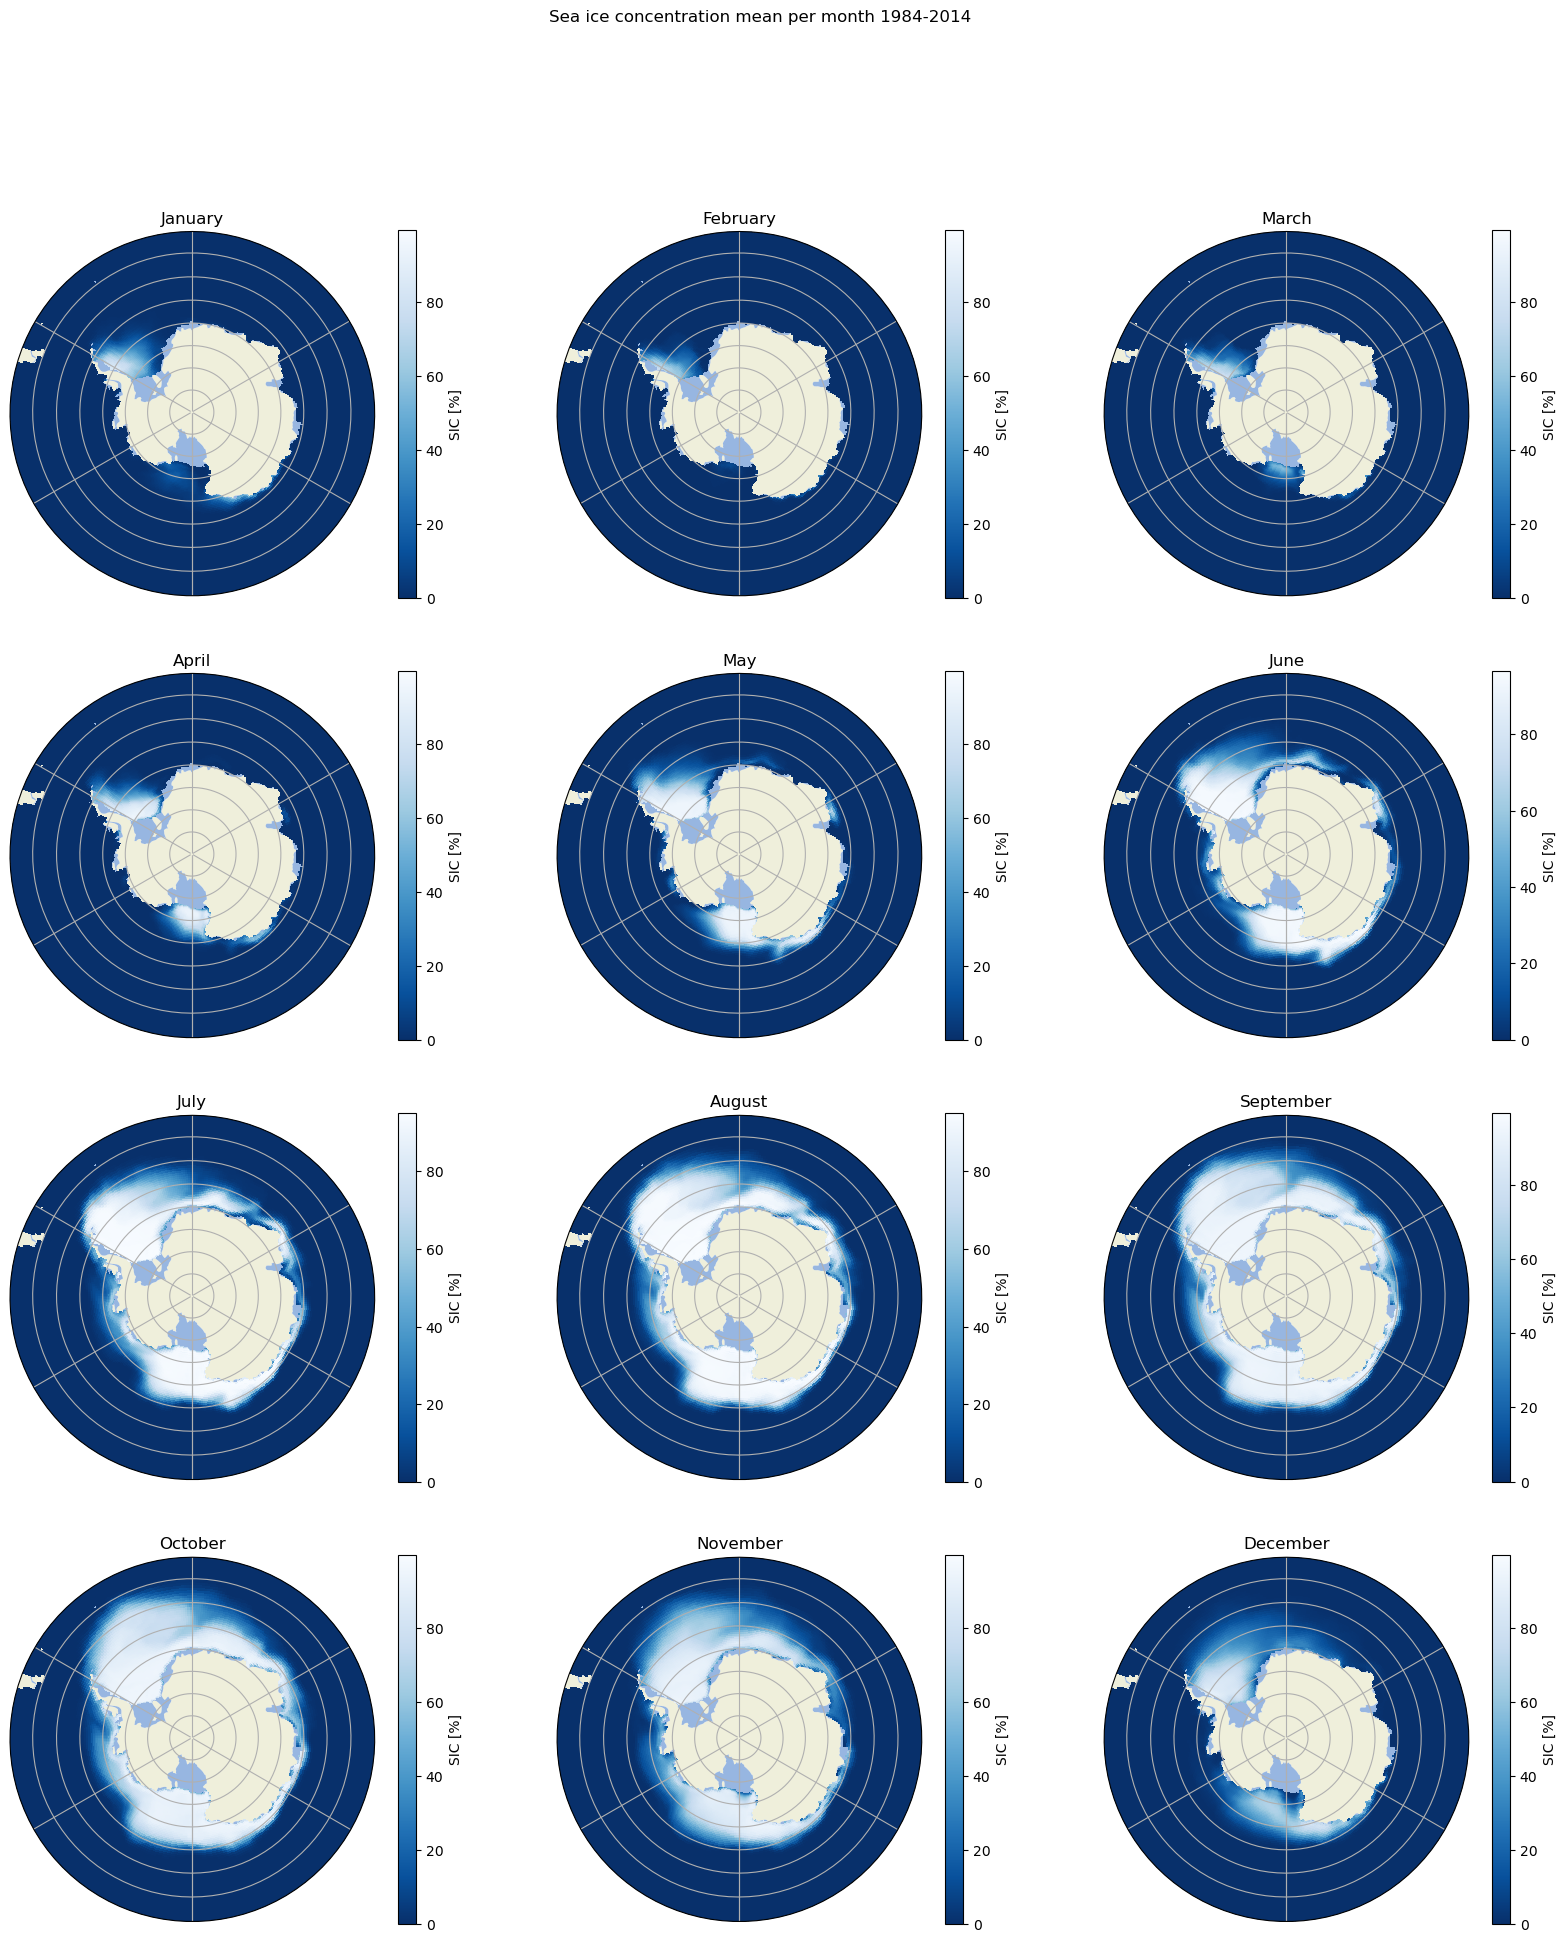

<Figure size 640x480 with 0 Axes>

In [9]:
fig = plt.figure(figsize=[20, 22])
fig.suptitle('Sea ice concentration mean per month 1984-2014')
monthnames = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

for i in range(len(month_mean_rec)):
    ax1 = plt.subplot(4, 3, 1+i, projection=ccrs.SouthPolarStereo())
    # Limit the map to -50 degrees latitude and below.
    ax1.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
    ax1.add_feature(cartopy.feature.LAND)
    ax1.add_feature(cartopy.feature.OCEAN)
    ax1.gridlines()

    #make circular instead of square plot by setting circular boundaries
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)

    ax1.set_boundary(circle, transform=ax1.transAxes)

    im = ax1.pcolormesh(multids.longitude, multids.latitude,
                    month_mean_rec[i], 
                        cmap='Blues_r',
                        transform=ccrs.PlateCarree())
    plt.title(str(monthnames[i]))
    cbar = plt.colorbar(im, ax=ax1)
    cbar.set_label('SIC [%]')
plt.show()
plt.clf()
   

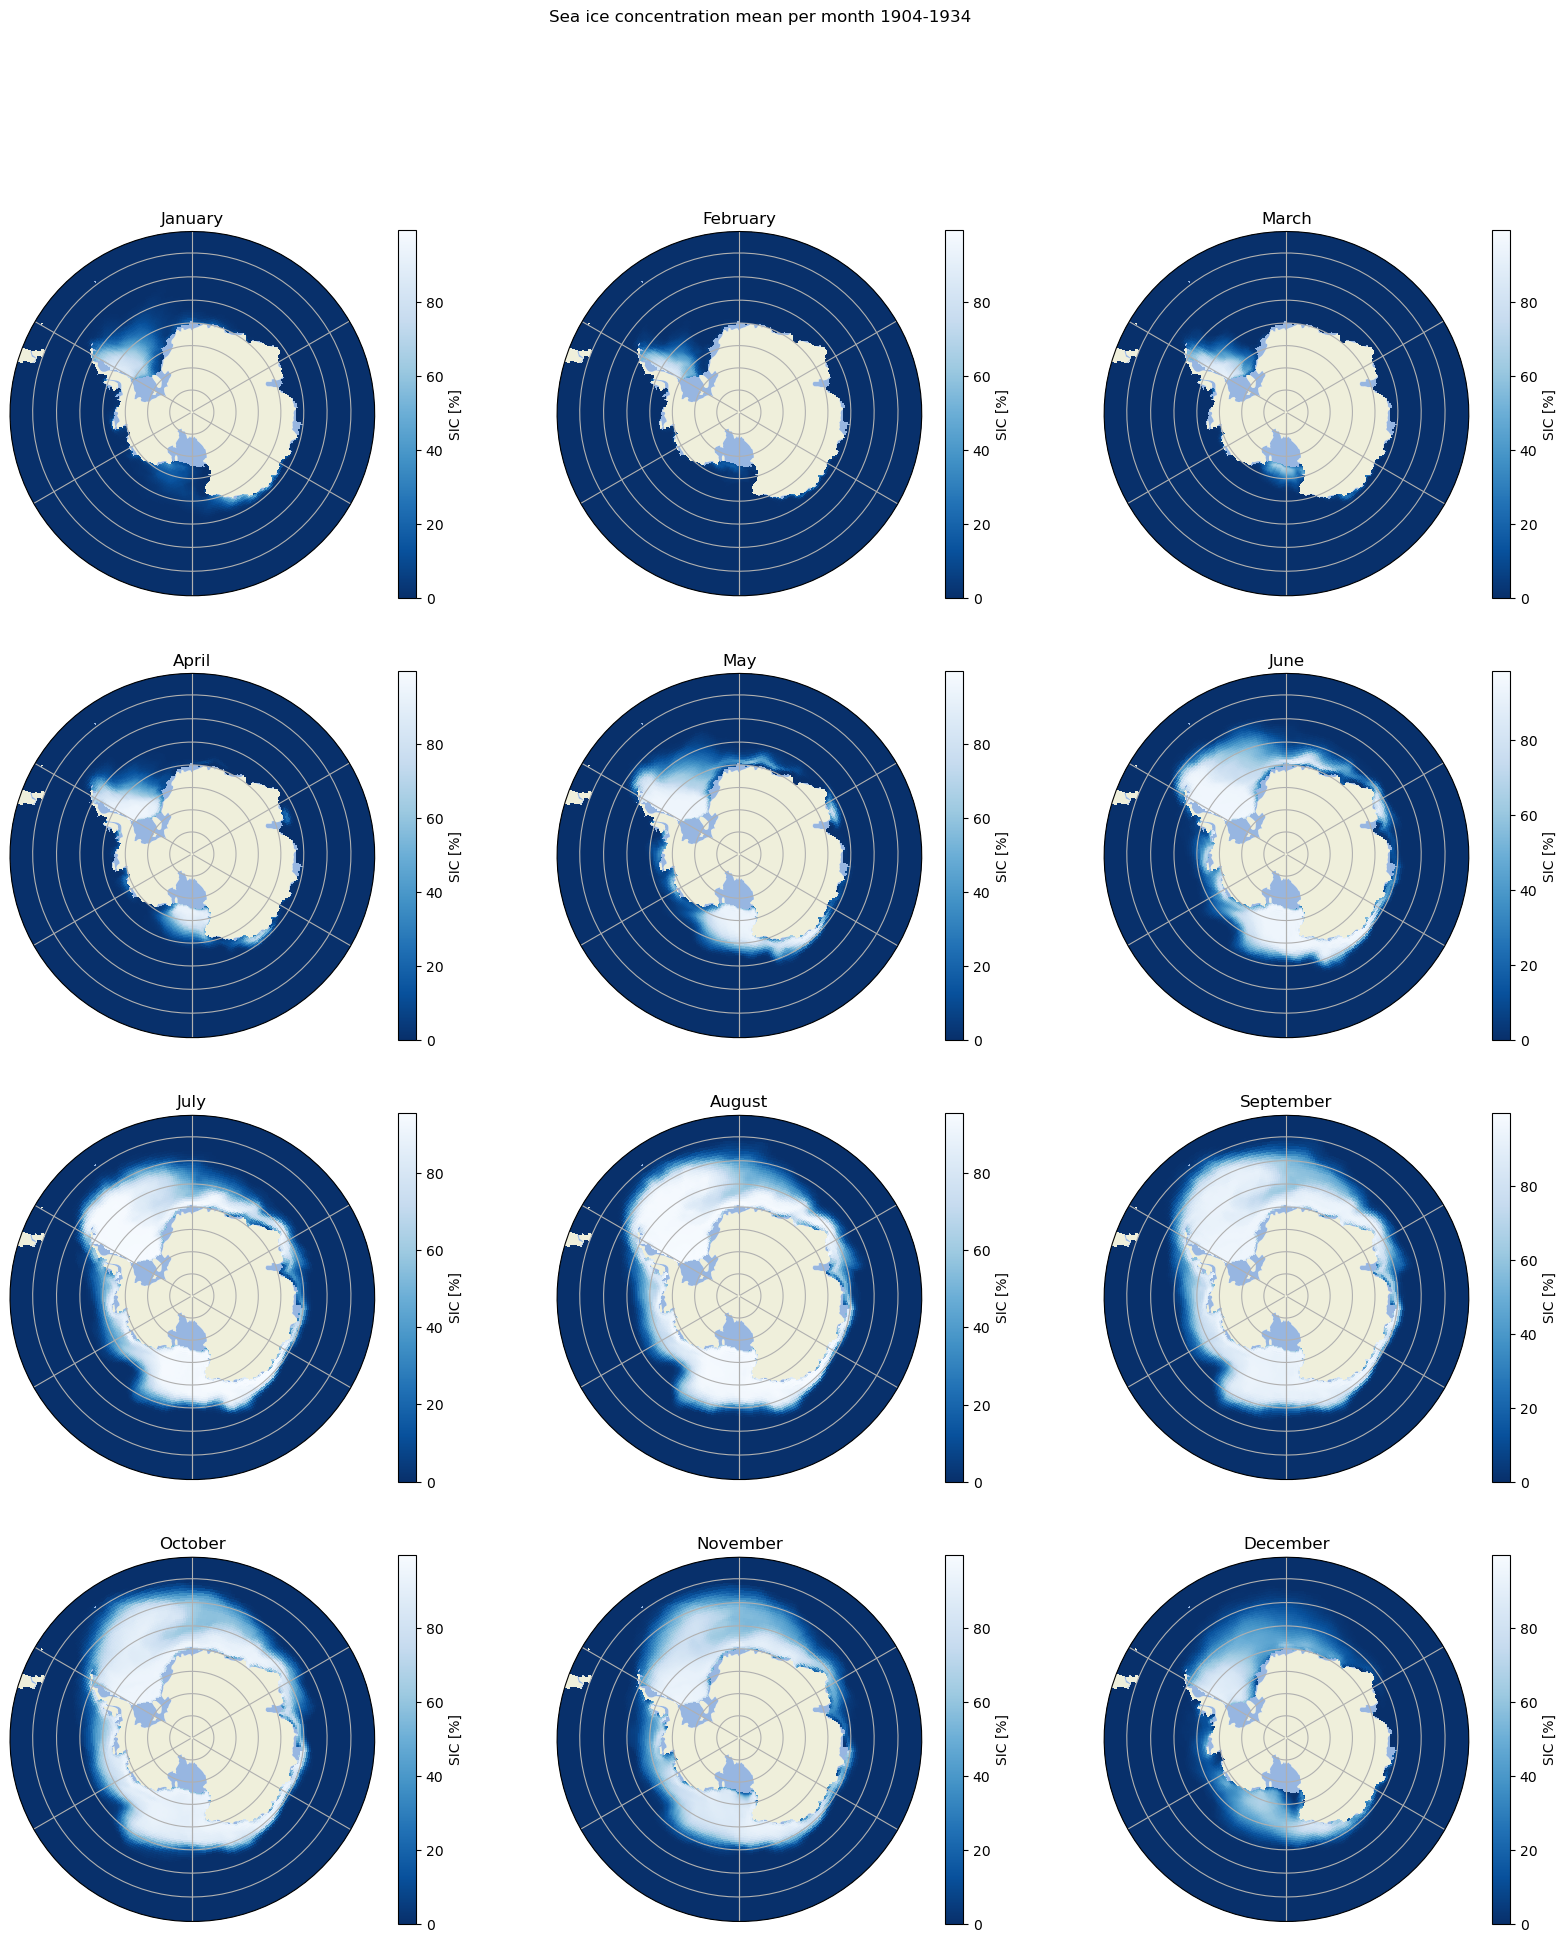

<Figure size 640x480 with 0 Axes>

In [10]:
fig = plt.figure(figsize=[20, 22])
fig.suptitle('Sea ice concentration mean per month 1904-1934')

for i in range(len(month_mean_past)):
    ax1 = plt.subplot(4, 3, 1+i, projection=ccrs.SouthPolarStereo())
    # Limit the map to -50 degrees latitude and below.
    ax1.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
    ax1.add_feature(cartopy.feature.LAND)
    ax1.add_feature(cartopy.feature.OCEAN)
    ax1.gridlines()

    #make circular instead of square plot by setting circular boundaries
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)

    ax1.set_boundary(circle, transform=ax1.transAxes)

    im = ax1.pcolormesh(multids.longitude, multids.latitude,
                    month_mean_past[i], 
                        cmap='Blues_r',
                        transform=ccrs.PlateCarree())
    plt.title(str(monthnames[i]))
    cbar = plt.colorbar(im, ax=ax1)
    cbar.set_label('SIC [%]')
plt.show()
plt.clf()

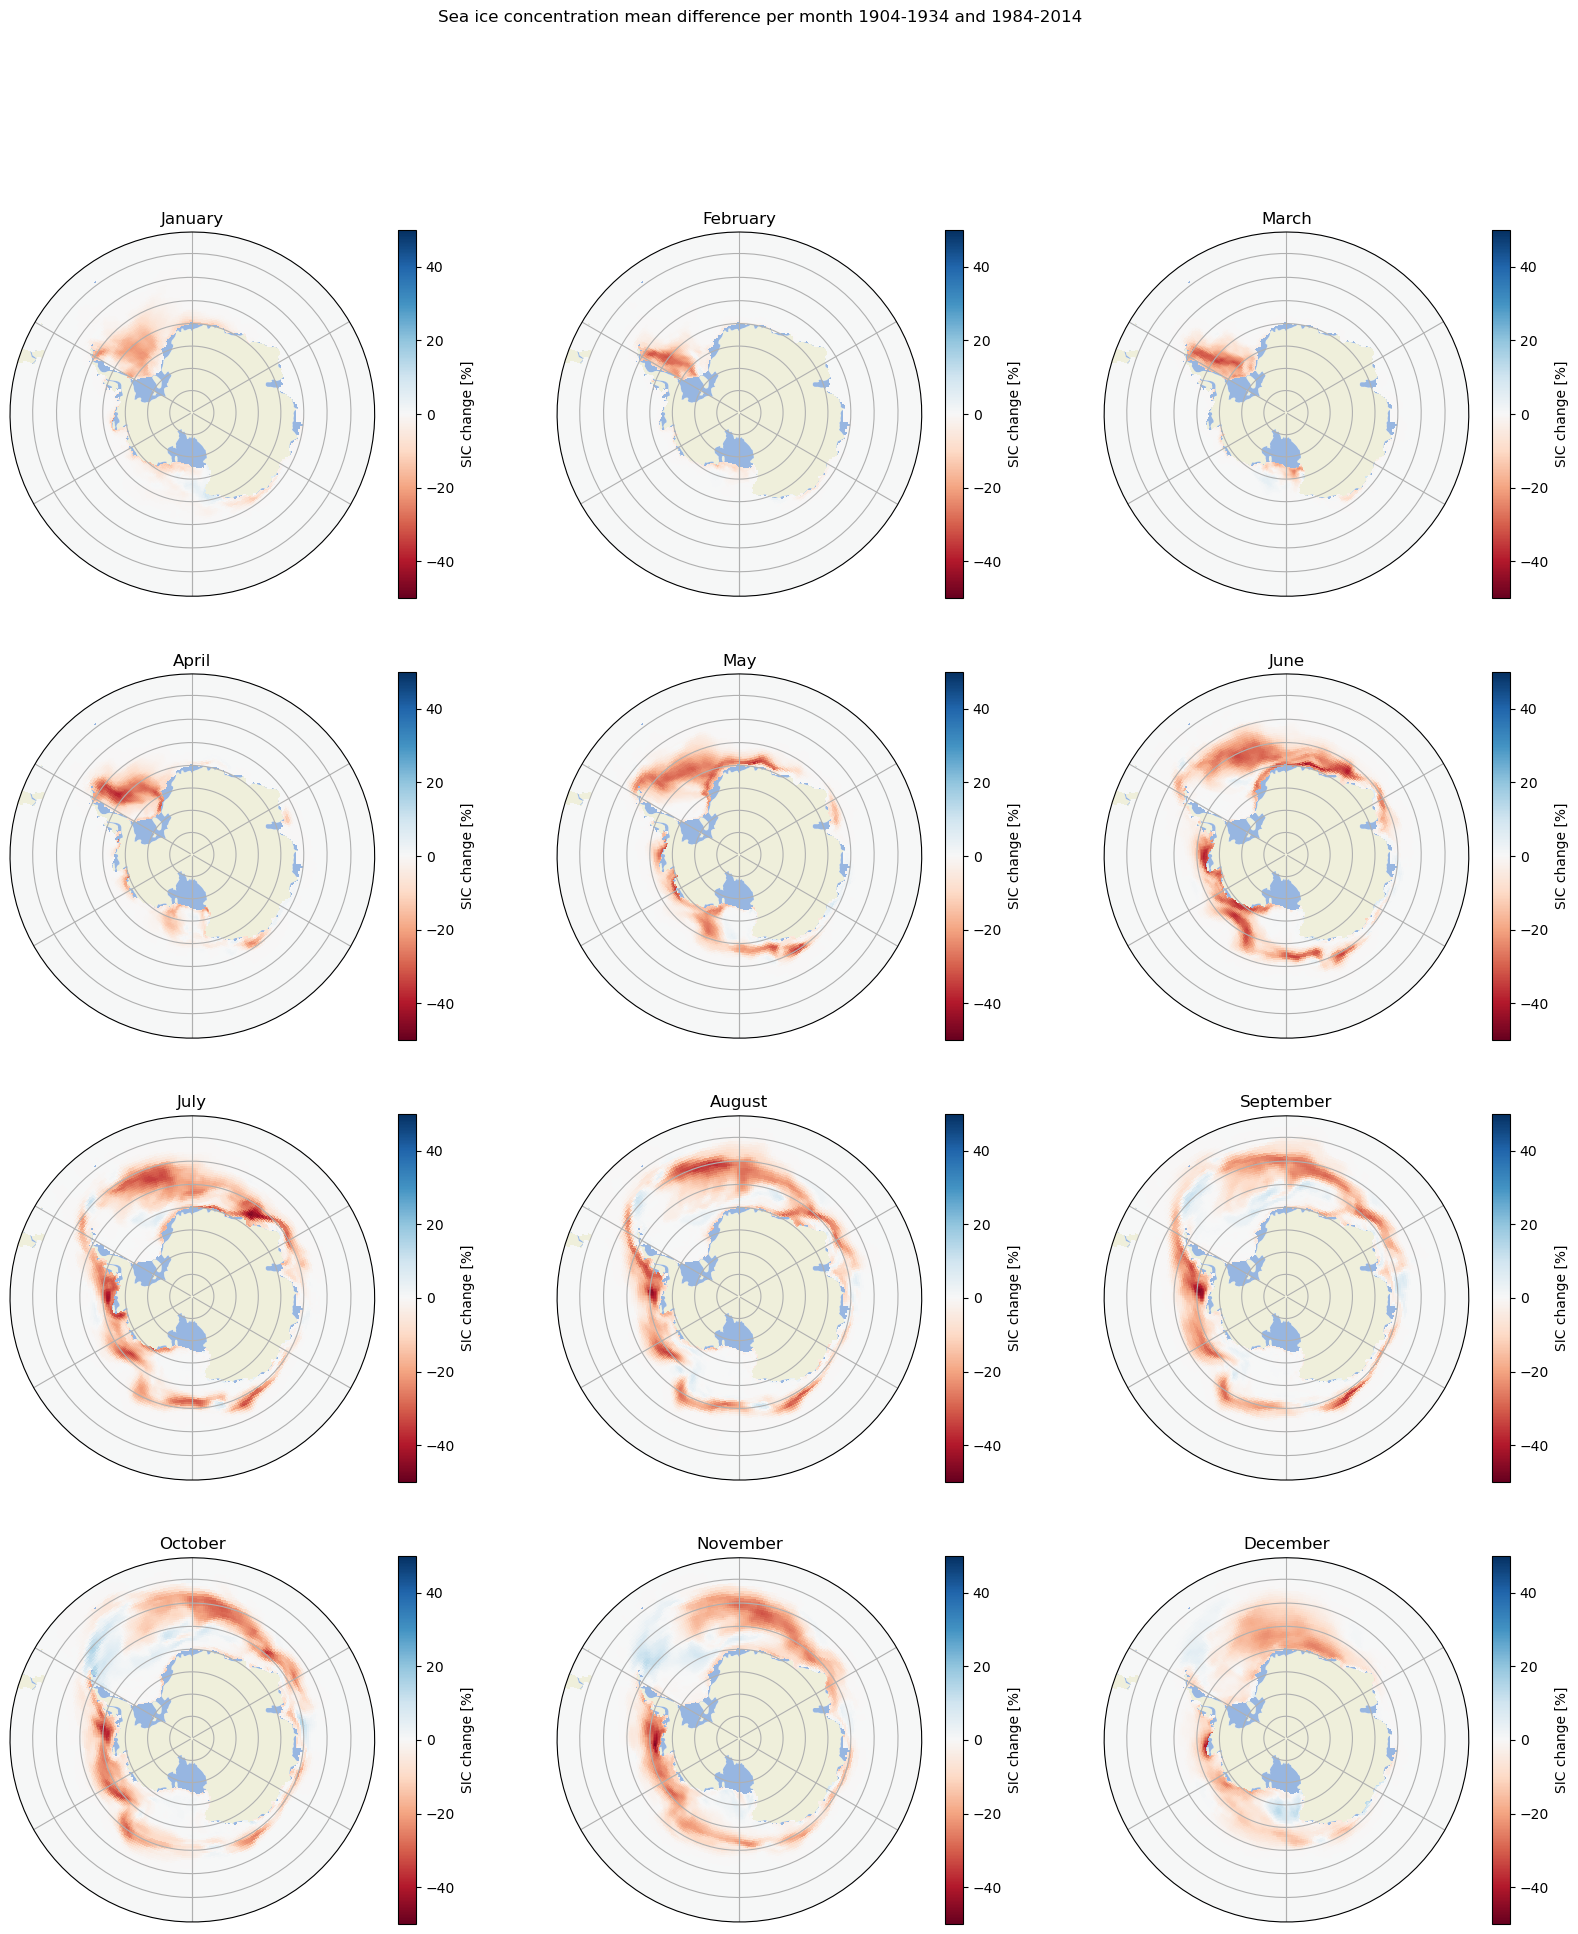

<Figure size 640x480 with 0 Axes>

In [11]:
fig = plt.figure(figsize=[20, 22])
fig.suptitle('Sea ice concentration mean difference per month 1904-1934 and 1984-2014')

for i in range(len(month_mean_diff)):
    ax1 = plt.subplot(4, 3, 1+i, projection=ccrs.SouthPolarStereo())
    # Limit the map to -50 degrees latitude and below.
    ax1.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
    ax1.add_feature(cartopy.feature.LAND)
    ax1.add_feature(cartopy.feature.OCEAN)
    ax1.gridlines()

    #make circular instead of square plot by setting circular boundaries
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)

    ax1.set_boundary(circle, transform=ax1.transAxes)

    im = ax1.pcolormesh(multids.longitude, multids.latitude,
                        month_mean_diff[i], 
                        vmin = -50., vmax=50., 
                        cmap='RdBu',
                        transform=ccrs.PlateCarree())
    # im2 = ax1.contour(multids.longitude, multids.latitude,
    #                    month_mean_diff[i]>0.15, 
    #                    colors = 'black', 
    #                    transform=ccrs.PlateCarree())
    plt.title(str(monthnames[i]))
    cbar = plt.colorbar(im, ax=ax1)
    cbar.set_label('SIC change [%]')
plt.show()
plt.clf()

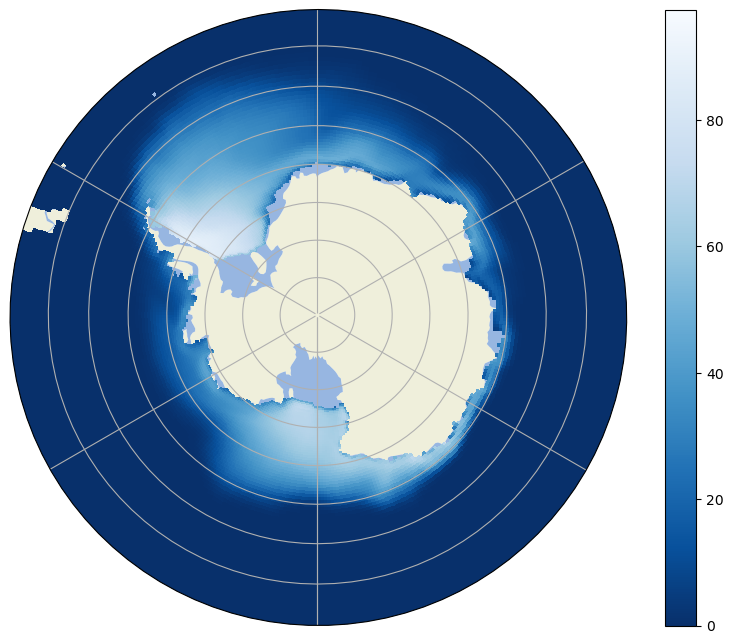

In [15]:
fig = plt.figure(figsize=[10, 8])
ax1 = plt.subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())
# Limit the map to -50 degrees latitude and below.
ax1.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
ax1.add_feature(cartopy.feature.LAND)
ax1.add_feature(cartopy.feature.OCEAN)
ax1.gridlines()

theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax1.set_boundary(circle, transform=ax1.transAxes)

im = ax1.pcolormesh(multids.longitude, multids.latitude,
                     multids.siconc.sel(time = slice("1984-01-01", "2014-12-31")).mean('time'), 
                     cmap='Blues_r',
                     transform=ccrs.PlateCarree())
plt.colorbar(im, ax=ax1)

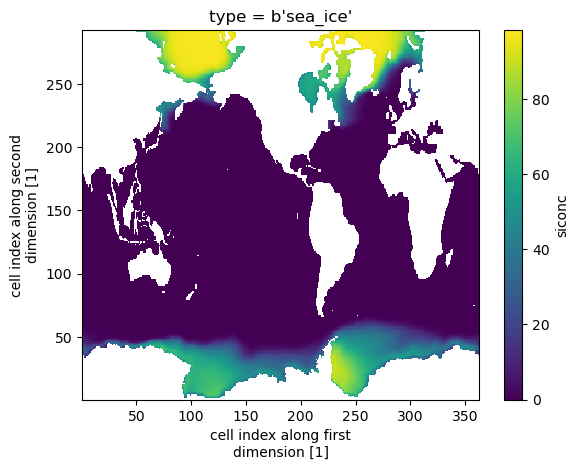

In [16]:
multids.siconc.mean('time').plot()

/usr/people/ijzerman/miniconda3/envs/jan_env/lib/python3.11/site-packages/dask/array/numpy_compat.py:43: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


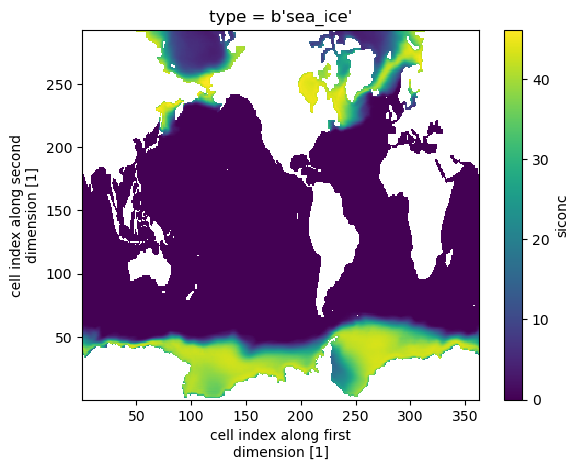

In [17]:
multids.siconc.std('time').plot()

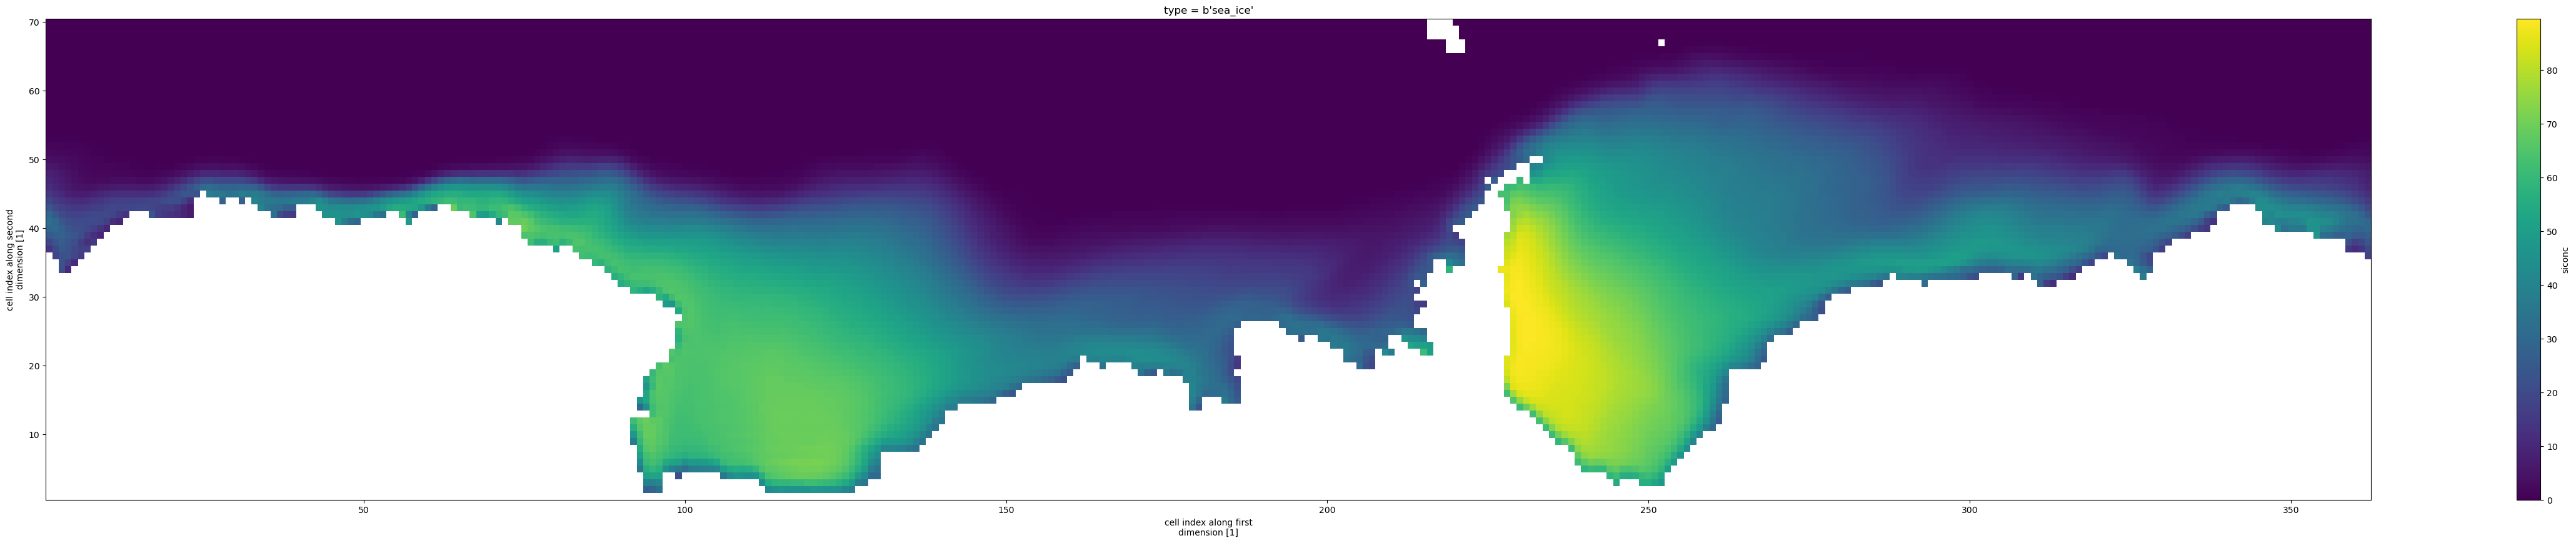

In [18]:
multids.siconc.isel(j=slice(0,70)).sel(time = slice("1980-01-01", "2010-01-01")).mean('time').plot(size=10, aspect=6) #j=("-90", "-60"), i=("-40","0")

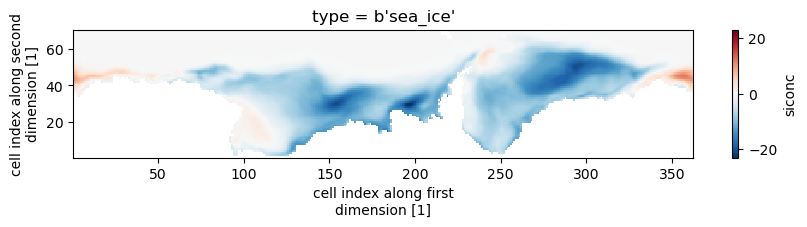

In [19]:
(multids.siconc.isel(j=slice(0,70)).sel(time = slice("1980-01-01", "2010-01-01")).mean('time') - multids.siconc.isel(j=slice(0,70)).sel(time = slice("1850-01-01", "1880-01-01")).mean('time')).plot(figsize=(10,1.66)) #j=("-90", "-60"), i=("-40","0")

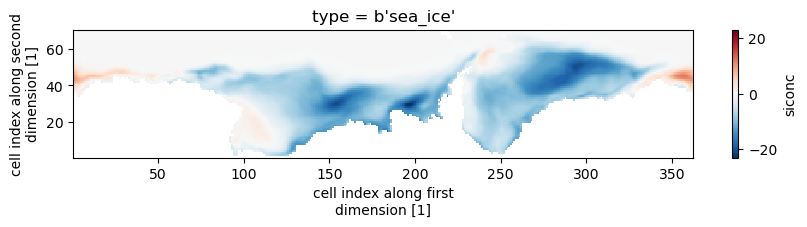

In [9]:
def diff_modern_pi(da, arg2='default_value'):
    """ this function takes the difference between the modern climatology and the pre-indutrial one and plots it """
    assert(type(da)==xr.core.dataarray.DataArray)
    print(arg2)
    result = (da.isel(j=slice(0,70)).sel(time = slice("1980-01-01", "2010-01-01")).mean('time') -\
      da.isel(j=slice(0,70)).sel(time = slice("1850-01-01", "1880-01-01")).mean('time'))
    return result


# diff_result = diff_modern_pi(multids)
diff_result = diff_modern_pi(multids.siconc, arg2 = '')
diff_result.plot(figsize=(10,1.66)) #j=("-90", "-60"), i=("-40","0")

In [21]:
ds.latitude.values.max()

89.74176788330078

In [22]:
print(ds.longitude.sel(i=100, j=50).values)
#print(ds.latitude.sel(i=100, j=50).values)

171.5


In [12]:
(ds.siconc*aco/100/1e6/1e6).where(ds.latitude<0).sum(['i','j'])  # [% * m^2] -> [10^6 km^2]

<xarray.Dataset>
Dimensions:             (time: 12, vertices: 4)
Coordinates:
  * time                (time) datetime64[ns] 1850-01-16T12:00:00 ... 1850-12...
    type                |S7 b'sea_ice'
Dimensions without coordinates: vertices
Data variables:
    vertices_latitude   (time, vertices) float64 -8.288e-08 ... -2.107e-07
    vertices_longitude  (time, vertices) float64 3.426e-07 ... 7.141e-07
    areacello           (time) float32 1.584 0.9005 1.24 ... 12.28 9.501 4.462